In [1]:
import sys

sys.path.append("./../../src")

from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader, SubsetRandomSampler, Subset
from Transformer import SpeechCommandTransformer, train_transformer, calculate_class_weights, plot_confusion_matrix, plot_accuracy_loss, set_seed
import torch
from torch.optim import AdamW
import torch.nn as nn
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
torch.cuda.empty_cache()
set_seed(213)

In [2]:
train_dataset = SpeechCommandsDataset("../../data/train", mode="modified")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=6)

test_dataset = SpeechCommandsDataset("../../data/test", mode="modified")
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=6)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class_weights = calculate_class_weights(train_dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

In [7]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion)

Epoch [1/20], Train Loss: 2.5115, Train Accuracy: 16.03, Test Accuracy: 3.57%


Epoch [2/20], Train Loss: 2.4919, Train Accuracy: 31.67, Test Accuracy: 3.87%


Epoch [3/20], Train Loss: 2.4902, Train Accuracy: 37.33, Test Accuracy: 60.71%


Epoch [4/20], Train Loss: 2.4873, Train Accuracy: 51.95, Test Accuracy: 60.71%


Epoch [5/20], Train Loss: 2.4861, Train Accuracy: 53.68, Test Accuracy: 60.71%


Epoch [6/20], Train Loss: 2.4859, Train Accuracy: 54.37, Test Accuracy: 60.71%
Early stopping at epoch 6
Best Test Accuracy: 60.71%, Best Train Accuracy: 37.33%


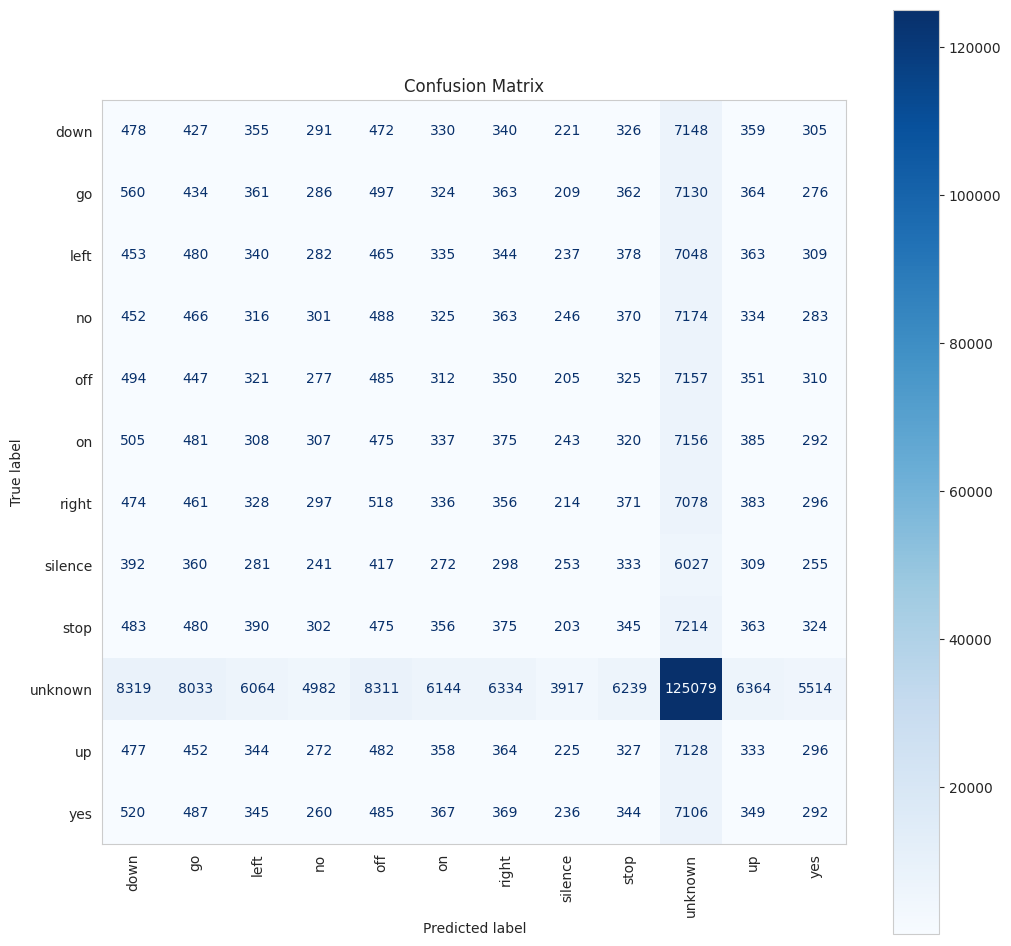

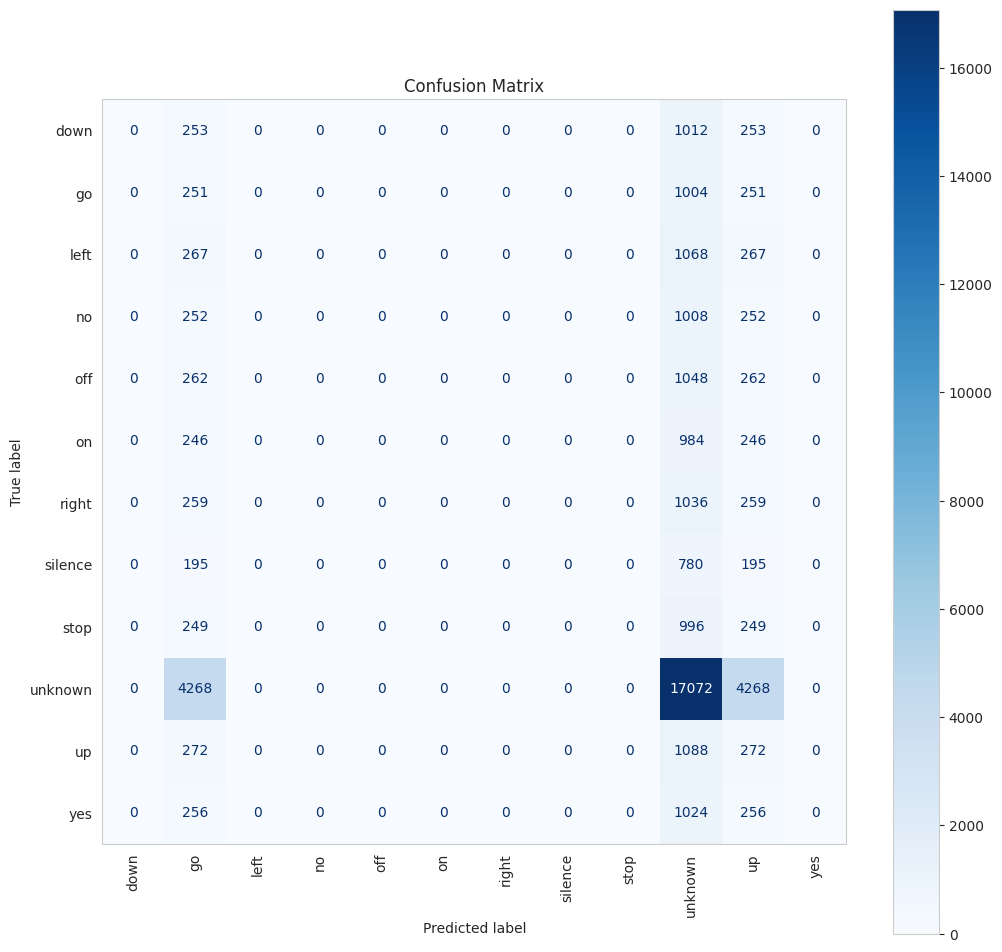

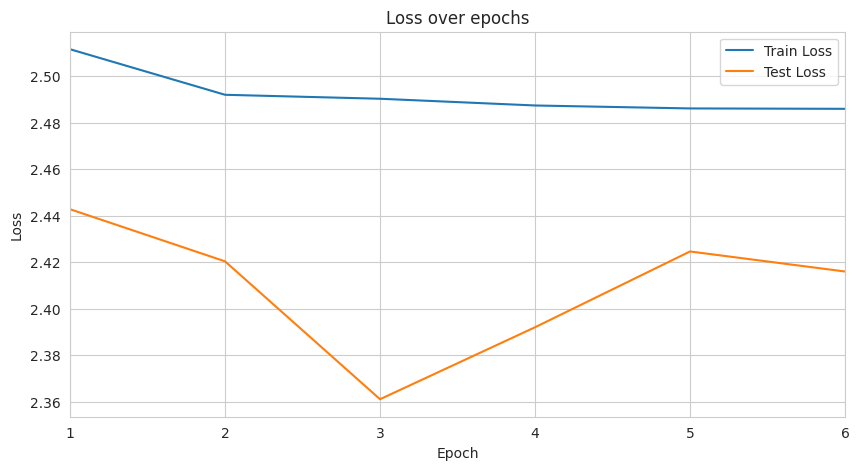

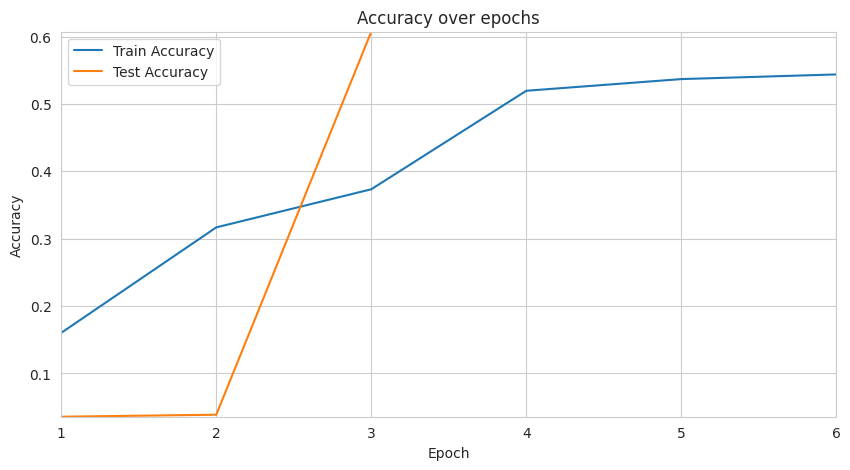

In [8]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=False)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=False)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [9]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

Epoch [1/20], Train Loss: 1.8435, Train Accuracy: 20.32, Test Accuracy: 28.82%


Epoch [2/20], Train Loss: 1.1333, Train Accuracy: 36.53, Test Accuracy: 45.21%


Epoch [3/20], Train Loss: 0.8846, Train Accuracy: 47.48, Test Accuracy: 60.94%


Epoch [4/20], Train Loss: 0.7311, Train Accuracy: 55.42, Test Accuracy: 56.73%


Epoch [5/20], Train Loss: 0.6245, Train Accuracy: 60.89, Test Accuracy: 63.21%


Epoch [6/20], Train Loss: 0.5674, Train Accuracy: 65.27, Test Accuracy: 63.43%


Epoch [7/20], Train Loss: 0.5110, Train Accuracy: 68.00, Test Accuracy: 72.30%


Epoch [8/20], Train Loss: 0.4666, Train Accuracy: 70.94, Test Accuracy: 71.48%


Epoch [9/20], Train Loss: 0.4214, Train Accuracy: 73.48, Test Accuracy: 69.45%


Epoch [10/20], Train Loss: 0.3913, Train Accuracy: 75.24, Test Accuracy: 73.47%


Epoch [11/20], Train Loss: 0.2704, Train Accuracy: 81.33, Test Accuracy: 81.78%


Epoch [12/20], Train Loss: 0.2512, Train Accuracy: 82.51, Test Accuracy: 80.43%


Epoch [13/20], Train Loss: 0.2450, Train Accuracy: 83.10, Test Accuracy: 81.22%


Epoch [14/20], Train Loss: 0.2356, Train Accuracy: 83.34, Test Accuracy: 80.17%


Epoch [15/20], Train Loss: 0.2275, Train Accuracy: 83.90, Test Accuracy: 81.38%


Epoch [16/20], Train Loss: 0.2274, Train Accuracy: 83.97, Test Accuracy: 82.02%


Epoch [17/20], Train Loss: 0.2157, Train Accuracy: 84.32, Test Accuracy: 82.93%


Epoch [18/20], Train Loss: 0.2121, Train Accuracy: 84.58, Test Accuracy: 82.35%


Epoch [19/20], Train Loss: 0.2056, Train Accuracy: 84.86, Test Accuracy: 82.69%


Epoch [20/20], Train Loss: 0.2034, Train Accuracy: 85.23, Test Accuracy: 83.04%
Best Test Accuracy: 83.04%, Best Train Accuracy: 85.23%


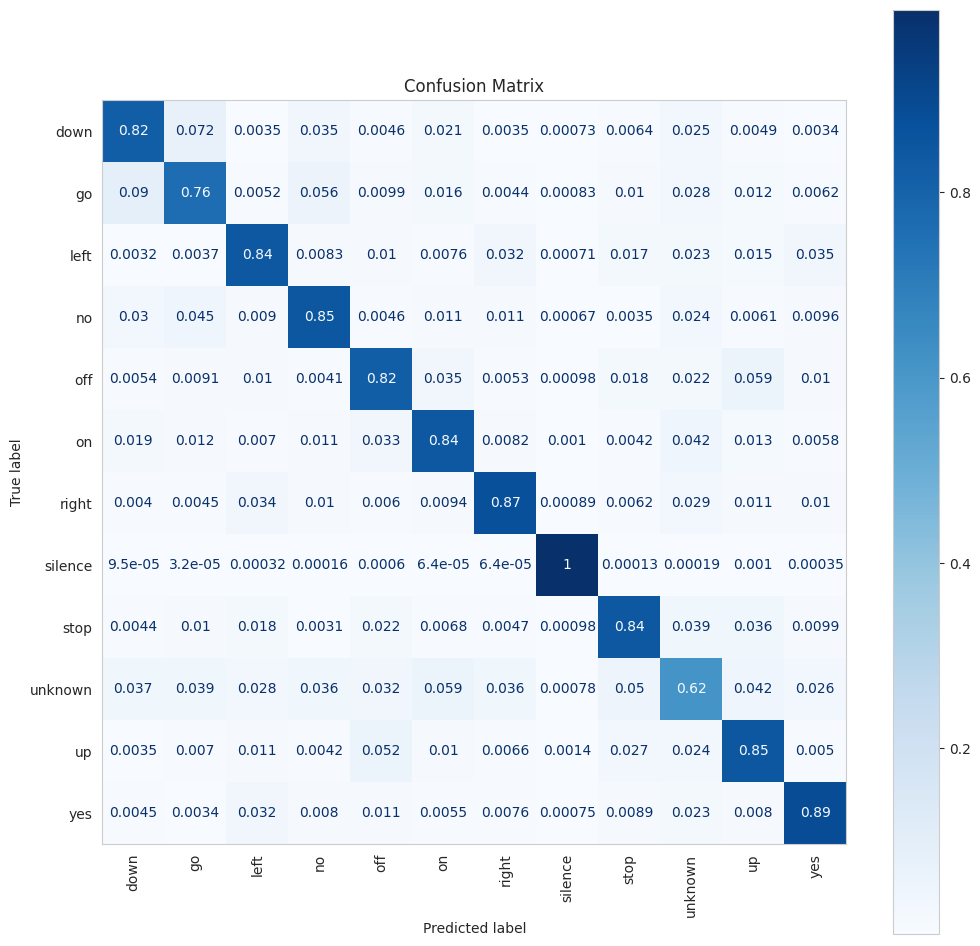

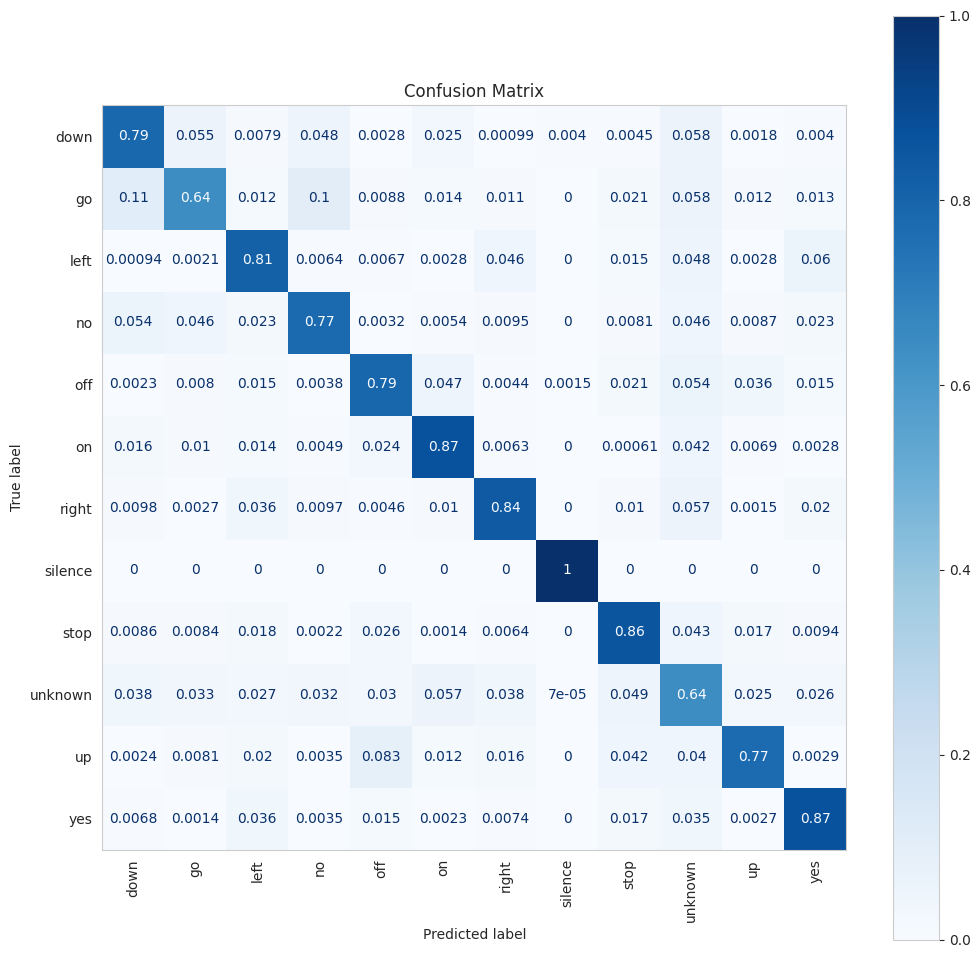

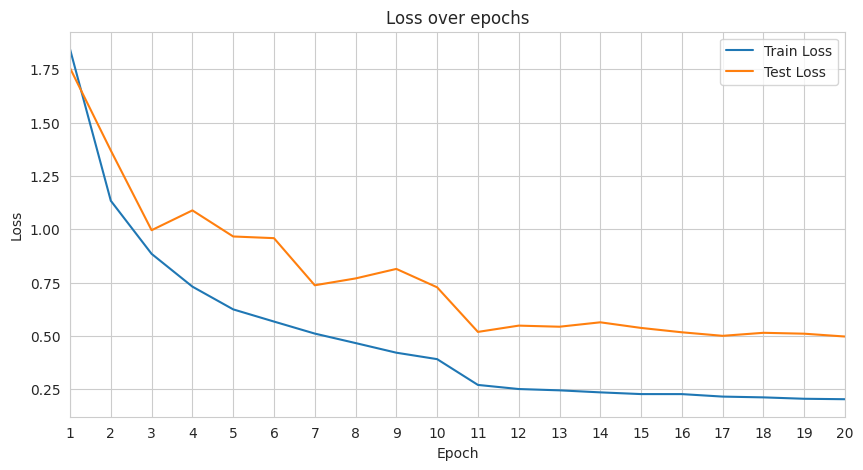

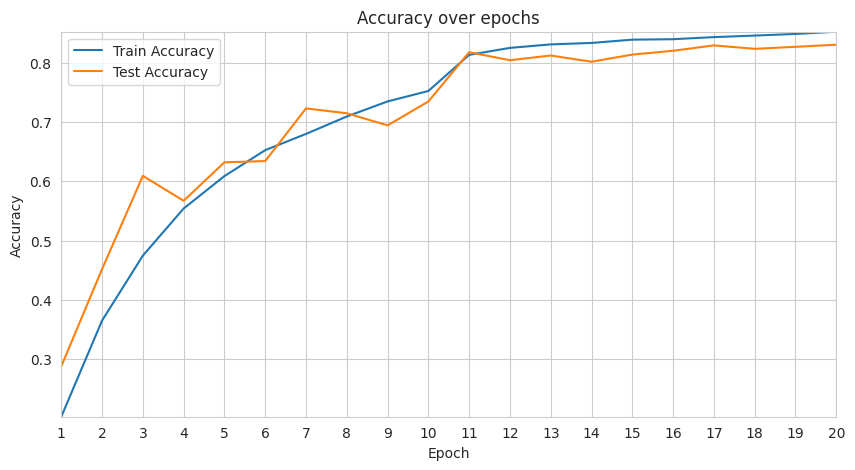

In [12]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [14]:
torch.cuda.empty_cache()

In [4]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer, scheduling=False)

Epoch [1/20], Train Loss: 1.8030, Train Accuracy: 21.37, Test Accuracy: 31.15%


Epoch [2/20], Train Loss: 1.0839, Train Accuracy: 39.22, Test Accuracy: 45.29%


Epoch [3/20], Train Loss: 0.8207, Train Accuracy: 50.69, Test Accuracy: 54.98%


Epoch [4/20], Train Loss: 0.6870, Train Accuracy: 57.97, Test Accuracy: 60.09%


Epoch [5/20], Train Loss: 0.6163, Train Accuracy: 62.43, Test Accuracy: 64.05%


Epoch [6/20], Train Loss: 0.5556, Train Accuracy: 66.18, Test Accuracy: 66.61%


Epoch [7/20], Train Loss: 0.5012, Train Accuracy: 68.73, Test Accuracy: 69.49%


Epoch [8/20], Train Loss: 0.4642, Train Accuracy: 70.59, Test Accuracy: 63.31%


Epoch [9/20], Train Loss: 0.4320, Train Accuracy: 73.05, Test Accuracy: 74.14%


Epoch [10/20], Train Loss: 0.3894, Train Accuracy: 75.02, Test Accuracy: 78.09%


Epoch [11/20], Train Loss: 0.3694, Train Accuracy: 76.05, Test Accuracy: 81.62%


Epoch [12/20], Train Loss: 0.3456, Train Accuracy: 77.35, Test Accuracy: 74.30%


Epoch [13/20], Train Loss: 0.3237, Train Accuracy: 78.49, Test Accuracy: 82.89%


Epoch [14/20], Train Loss: 0.2944, Train Accuracy: 79.99, Test Accuracy: 79.49%


Epoch [15/20], Train Loss: 0.2792, Train Accuracy: 80.78, Test Accuracy: 79.15%


Epoch [16/20], Train Loss: 0.2679, Train Accuracy: 81.52, Test Accuracy: 75.96%


Epoch [17/20], Train Loss: 0.2478, Train Accuracy: 82.58, Test Accuracy: 82.76%


Epoch [18/20], Train Loss: 0.2333, Train Accuracy: 83.49, Test Accuracy: 83.02%


Epoch [19/20], Train Loss: 0.2248, Train Accuracy: 84.05, Test Accuracy: 83.23%


Epoch [20/20], Train Loss: 0.2112, Train Accuracy: 84.75, Test Accuracy: 77.84%
Best Test Accuracy: 77.84%, Best Train Accuracy: 84.75%


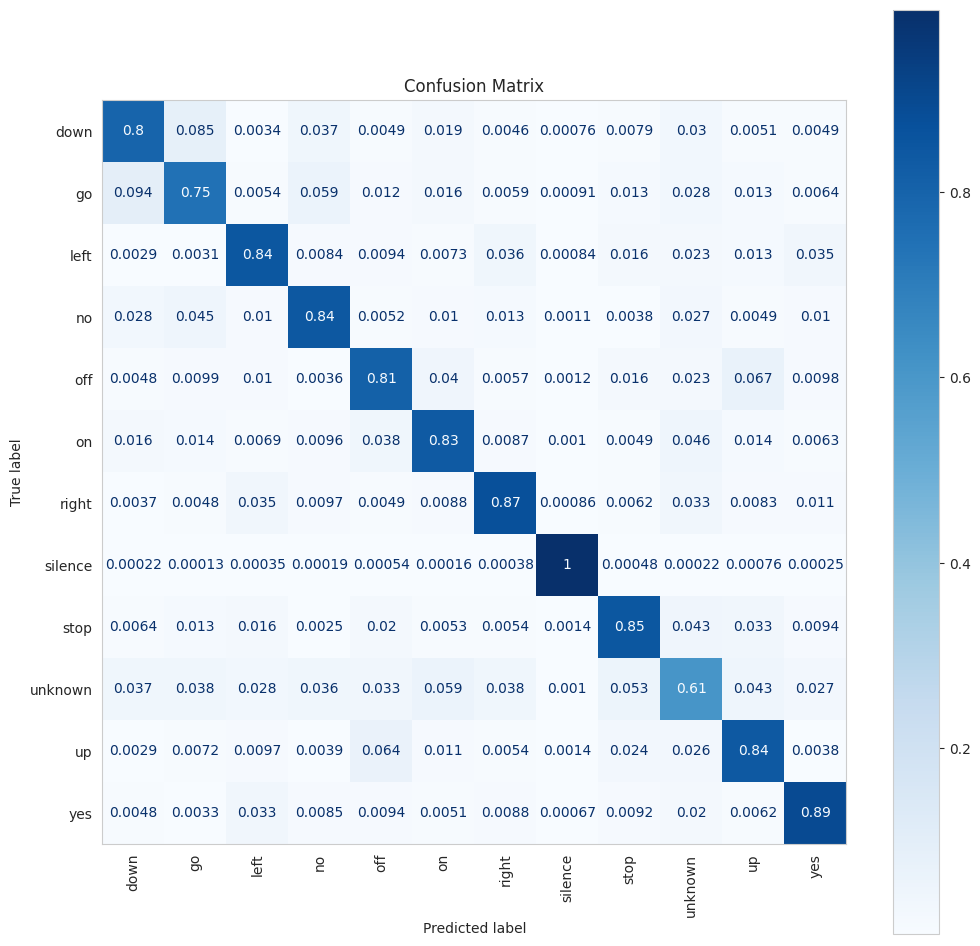

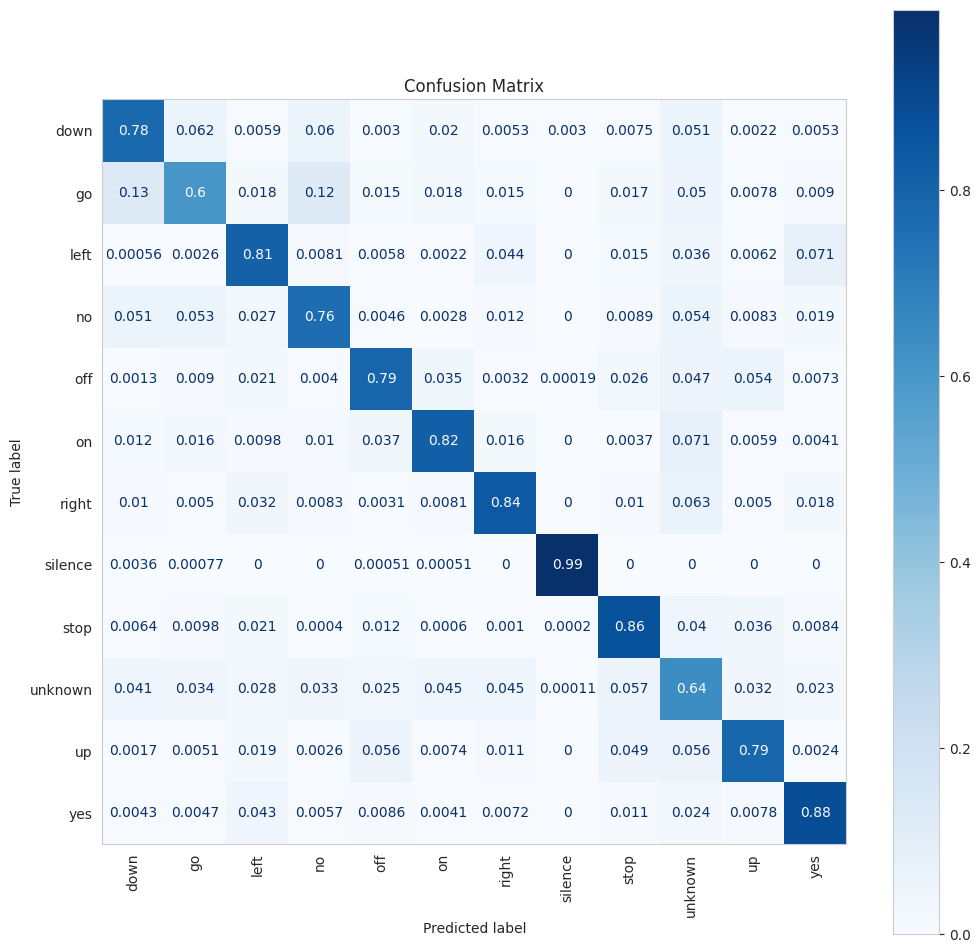

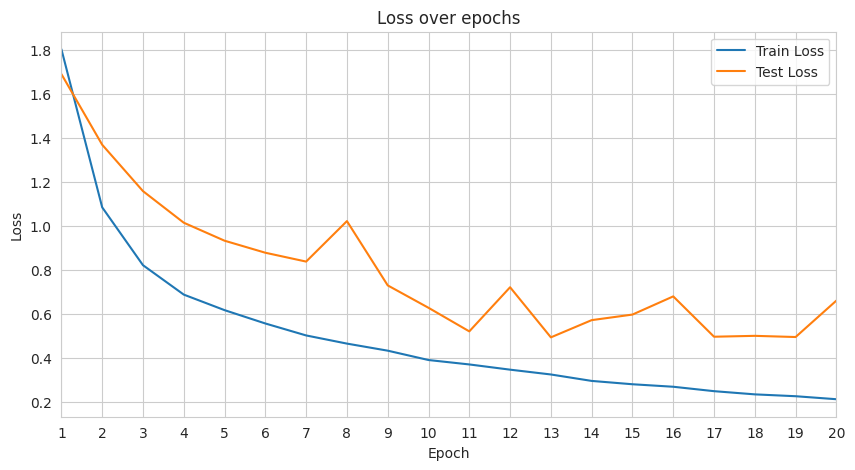

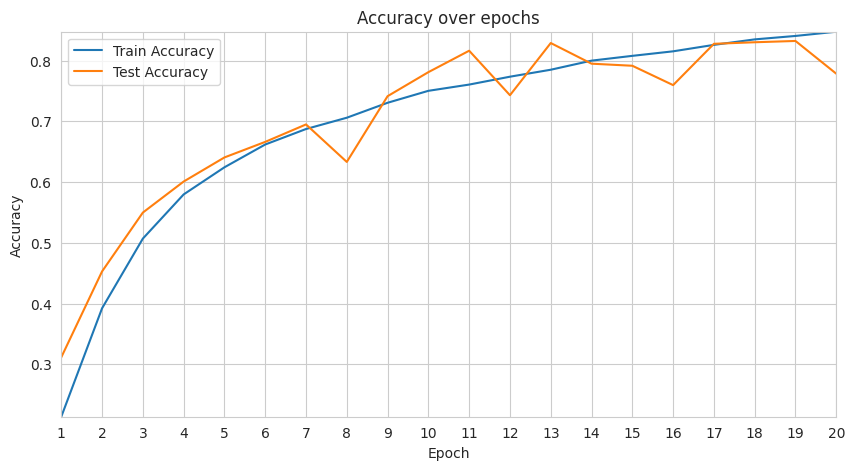

In [5]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [6]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2, pos_embedding=True).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

Epoch [1/20], Train Loss: 2.2143, Train Accuracy: 17.05, Test Accuracy: 19.99%


Epoch [2/20], Train Loss: 1.5154, Train Accuracy: 26.83, Test Accuracy: 32.90%


Epoch [3/20], Train Loss: 1.1181, Train Accuracy: 38.53, Test Accuracy: 47.11%


Epoch [4/20], Train Loss: 0.8892, Train Accuracy: 47.59, Test Accuracy: 54.37%


Epoch [5/20], Train Loss: 0.7384, Train Accuracy: 54.49, Test Accuracy: 67.87%


Epoch [6/20], Train Loss: 0.6482, Train Accuracy: 60.13, Test Accuracy: 71.64%


Epoch [7/20], Train Loss: 0.5879, Train Accuracy: 63.89, Test Accuracy: 59.52%


Epoch [8/20], Train Loss: 0.5321, Train Accuracy: 66.38, Test Accuracy: 73.21%


Epoch [9/20], Train Loss: 0.4890, Train Accuracy: 69.26, Test Accuracy: 73.51%


Epoch [10/20], Train Loss: 0.4535, Train Accuracy: 71.06, Test Accuracy: 69.25%


Epoch [11/20], Train Loss: 0.3213, Train Accuracy: 77.84, Test Accuracy: 77.37%


Epoch [12/20], Train Loss: 0.3059, Train Accuracy: 78.93, Test Accuracy: 77.28%


Epoch [13/20], Train Loss: 0.2930, Train Accuracy: 79.85, Test Accuracy: 78.95%


Epoch [14/20], Train Loss: 0.2868, Train Accuracy: 80.25, Test Accuracy: 81.38%


Epoch [15/20], Train Loss: 0.2794, Train Accuracy: 80.62, Test Accuracy: 80.40%


Epoch [16/20], Train Loss: 0.2759, Train Accuracy: 80.67, Test Accuracy: 80.21%


Epoch [17/20], Train Loss: 0.2661, Train Accuracy: 80.94, Test Accuracy: 81.85%


Epoch [18/20], Train Loss: 0.2618, Train Accuracy: 81.66, Test Accuracy: 80.28%


Epoch [19/20], Train Loss: 0.2604, Train Accuracy: 81.75, Test Accuracy: 80.01%


Epoch [20/20], Train Loss: 0.2521, Train Accuracy: 82.24, Test Accuracy: 80.91%
Best Test Accuracy: 80.91%, Best Train Accuracy: 82.24%


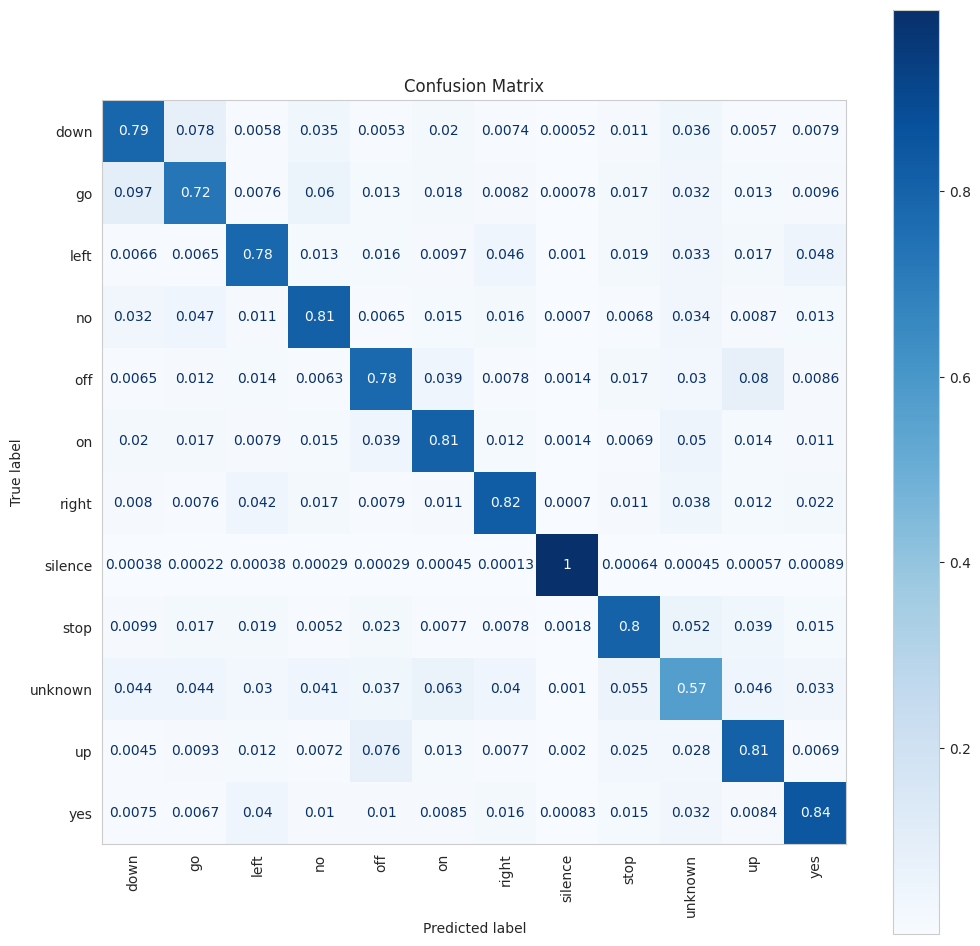

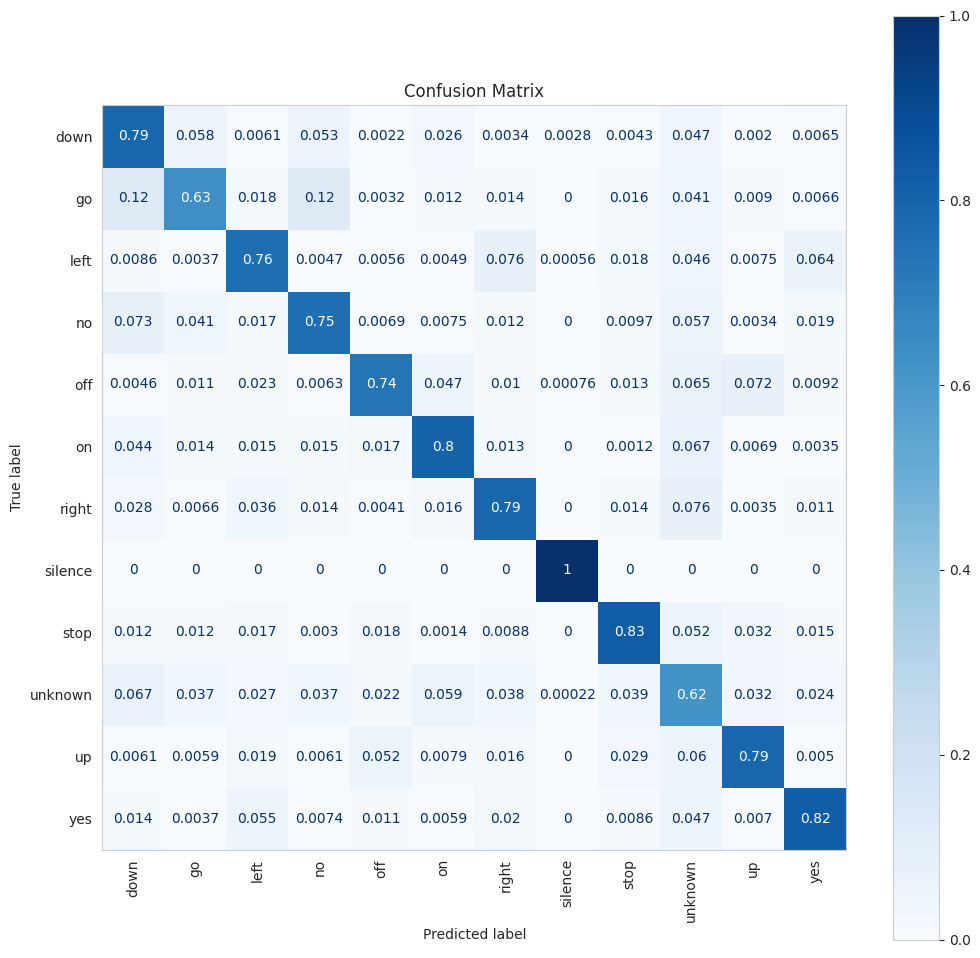

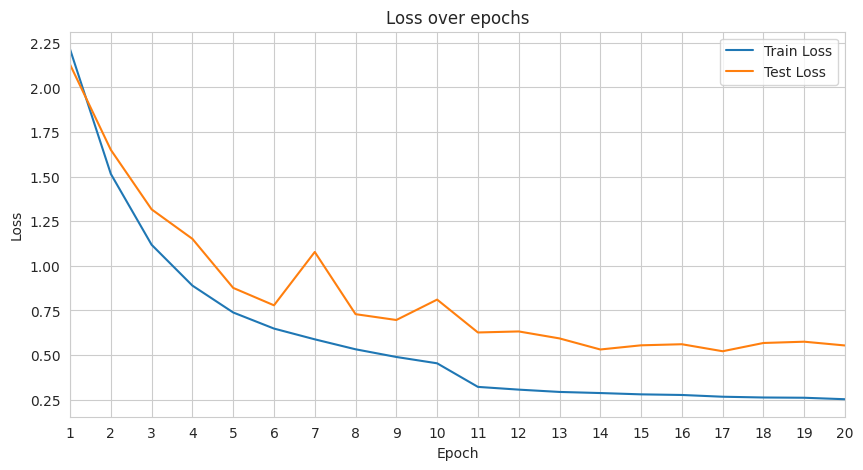

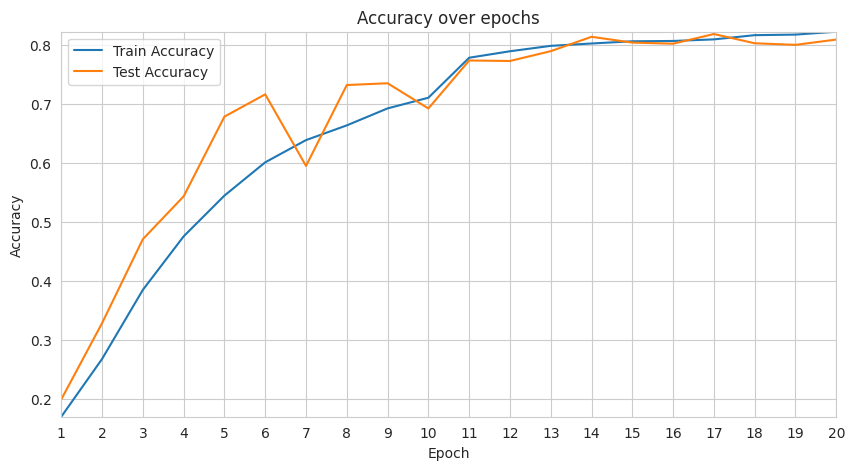

In [7]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [8]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer, scheduler=scheduler)

Epoch [1/20], Train Loss: 1.8326, Train Accuracy: 21.06, Test Accuracy: 34.55%


Epoch [2/20], Train Loss: 1.1493, Train Accuracy: 36.83, Test Accuracy: 44.44%


Epoch [3/20], Train Loss: 0.8649, Train Accuracy: 48.42, Test Accuracy: 52.84%


Epoch [4/20], Train Loss: 0.7022, Train Accuracy: 56.51, Test Accuracy: 60.26%


Epoch [5/20], Train Loss: 0.6150, Train Accuracy: 61.51, Test Accuracy: 64.40%


Epoch [6/20], Train Loss: 0.5426, Train Accuracy: 65.26, Test Accuracy: 66.50%


Epoch [7/20], Train Loss: 0.4832, Train Accuracy: 68.69, Test Accuracy: 66.30%


Epoch [8/20], Train Loss: 0.4426, Train Accuracy: 71.20, Test Accuracy: 74.69%


Epoch [9/20], Train Loss: 0.4049, Train Accuracy: 73.57, Test Accuracy: 72.43%


Epoch [10/20], Train Loss: 0.3690, Train Accuracy: 75.60, Test Accuracy: 77.87%


Epoch [11/20], Train Loss: 0.3346, Train Accuracy: 77.64, Test Accuracy: 79.73%


Epoch [12/20], Train Loss: 0.3019, Train Accuracy: 79.41, Test Accuracy: 79.84%


Epoch [13/20], Train Loss: 0.2754, Train Accuracy: 80.88, Test Accuracy: 81.25%


Epoch [14/20], Train Loss: 0.2533, Train Accuracy: 82.09, Test Accuracy: 77.58%


Epoch [15/20], Train Loss: 0.2362, Train Accuracy: 83.23, Test Accuracy: 77.04%


Epoch [16/20], Train Loss: 0.2198, Train Accuracy: 83.98, Test Accuracy: 80.64%


Epoch [17/20], Train Loss: 0.2078, Train Accuracy: 84.72, Test Accuracy: 80.68%


Epoch [18/20], Train Loss: 0.1976, Train Accuracy: 85.31, Test Accuracy: 81.31%


Epoch [19/20], Train Loss: 0.1914, Train Accuracy: 85.66, Test Accuracy: 82.25%


Epoch [20/20], Train Loss: 0.1897, Train Accuracy: 85.83, Test Accuracy: 82.11%
Best Test Accuracy: 82.11%, Best Train Accuracy: 85.83%


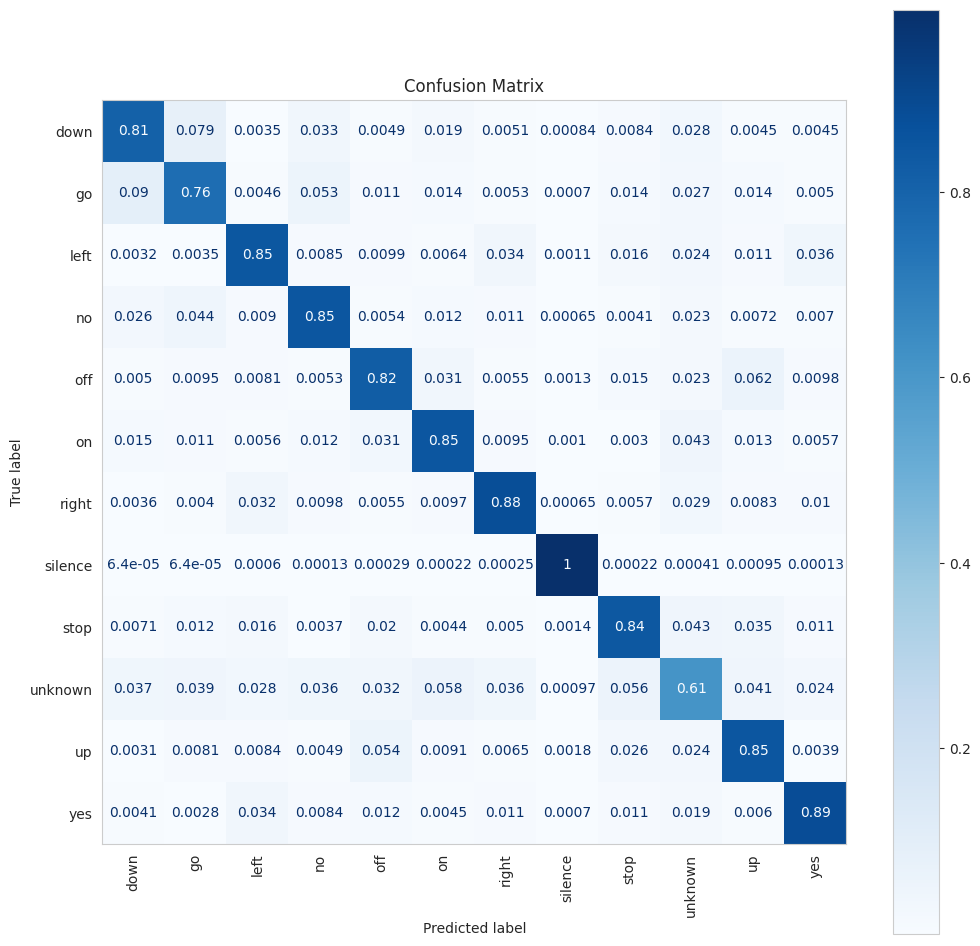

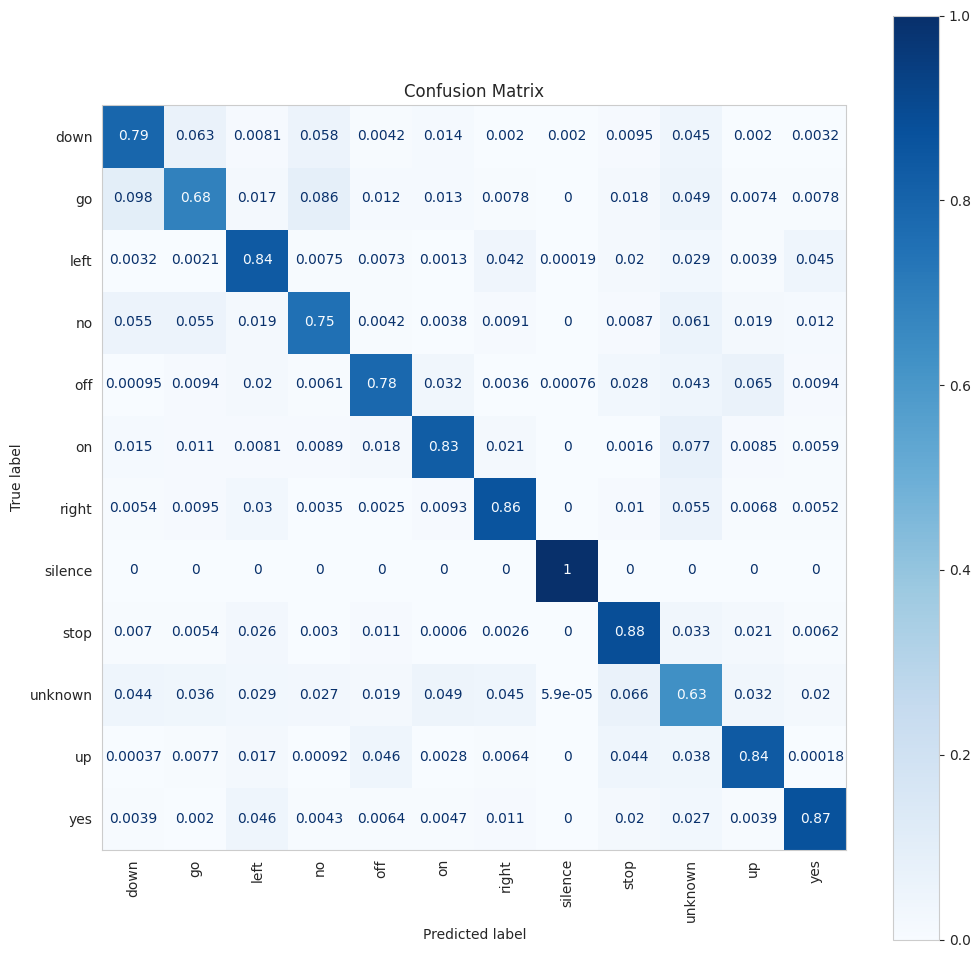

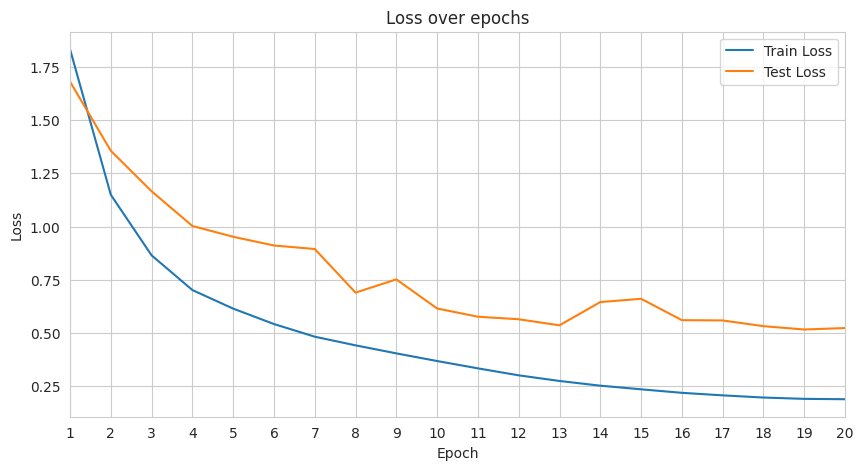

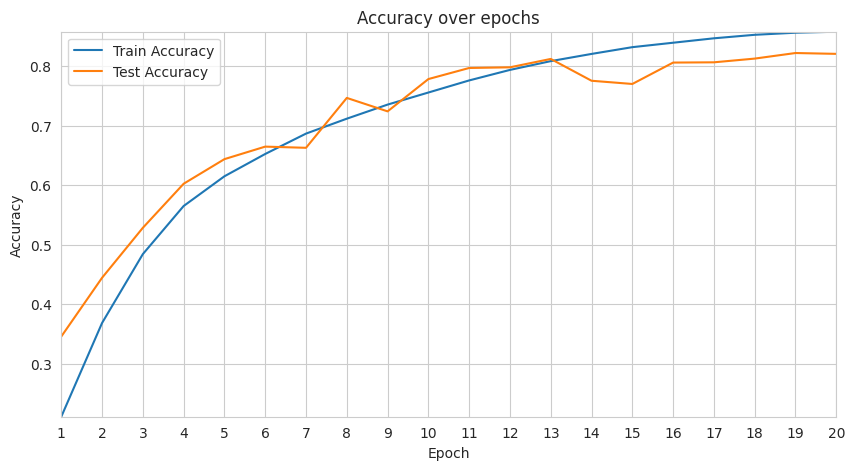

In [9]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.0001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2, num_layers=8).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2, num_heads=8).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)